In [3]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

from os.path import join
ruta = 'C:\Diplomado_IA_PUCP\Visualizacion_de_datos\proyecto'

In [30]:
# Save the first layer as mapa
#mapa = countries.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=mapa to the second layer
#stations_point.plot(markersize=10, color='orange', alpha=0.5, ax=mapa)
#mapa.axis('off')

In [4]:
# Import a shape file
region_geojson = geopandas.read_file(join(ruta,'peru-geojson-master\peru_departamental_simple.geojson'))
region_geojson.head()
#countries = geopandas.read_file(join(ruta,'peru_provincial_simple.shp'))

#print(countries.head())

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


<AxesSubplot:>

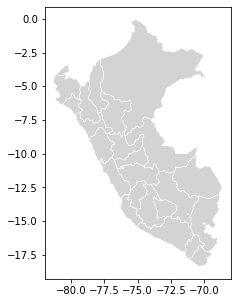

In [5]:
region_geojson.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))

<AxesSubplot:>

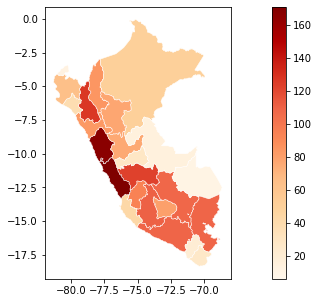

In [6]:
region_geojson.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='COUNT',legend=True,cmap='OrRd')

## Leyendo la data del SINADEF

In [7]:
sinadef = pd.read_csv(join(ruta,'fallecidos_sinadef.csv'),sep=';',index_col=0,skiprows=2,encoding='latin1')

C:\Users\HYMSLY\anaconda3\envs\geopandas\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
sinadef.head()

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,PROVINCIA DOMICILIO,...,DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X),Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
Nº,,,,,,,,,,,,,,,,,,,,,
1,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,MARISCAL CACERES,...,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN
2,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-12-08-06-000,PERU,LA LIBERTAD,ASCOPE,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN
3,IGNORADO,MASCULINO,59,AÑOS,SOLTERO,IGNORADO,92-33-24-01-01-000,PERU,CALLAO,CALLAO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN
4,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,LAMAS,...,HIPERTENSION ESENCIAL,I10X,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN
5,SIS,MASCULINO,51,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-14-10-01-106,PERU,LIMA,OYON,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN


In [9]:
#print(sinadef.describe())
print(sinadef.columns)

Index(['TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'COD# UBIGEO DOMICILIO', 'PAIS DOMICILIO',
       'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO', 'DISTRITO DOMICILIO',
       'FECHA', 'AÑO', 'MES', 'TIPO LUGAR', 'INSTITUCION', 'MUERTE VIOLENTA',
       'NECROPSIA', 'DEBIDO A (CAUSA A)', 'CAUSA A (CIE-X)',
       'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)', 'DEBIDO A (CAUSA C)',
       'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)', 'CAUSA D (CIE-X)',
       'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)', 'DEBIDO A (CAUSA F)',
       'CAUSA F (CIE-X)', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34'],
      dtype='object')


In [10]:
sinadef_keep = sinadef[['SEXO','EDAD','PAIS DOMICILIO','DEPARTAMENTO DOMICILIO','PROVINCIA DOMICILIO','FECHA', 'AÑO', 'MES','MUERTE VIOLENTA']]

In [11]:
sinadef_covid = sinadef_keep[(sinadef_keep['AÑO']*100+sinadef_keep['MES']>=202003) & (sinadef_keep['MUERTE VIOLENTA']=='SIN REGISTRO')]

In [12]:
sinadef_covid.shape

(319612, 9)

In [13]:
sinadef_covid_total = sinadef_covid['DEPARTAMENTO DOMICILIO'].value_counts(dropna=False).to_frame().reset_index().rename(columns={'index': 'departamento','DEPARTAMENTO DOMICILIO':'Muertes_total'})

In [14]:
sinadef_covid_total

,departamento,Muertes_total
0,LIMA,134746
1,LA LIBERTAD,18696
2,PIURA,17155
3,AREQUIPA,15074
4,CALLAO,14456
5,JUNIN,12869
6,ANCASH,12864
7,ICA,11624
8,CUSCO,10864
9,PUNO,10418


In [15]:
region_geojson['NOMBDEP']

0          AMAZONAS
1            ANCASH
2          APURIMAC
3          AREQUIPA
4          AYACUCHO
5         CAJAMARCA
6            CALLAO
7             CUSCO
8      HUANCAVELICA
9           HUANUCO
10              ICA
11            JUNIN
12      LA LIBERTAD
13       LAMBAYEQUE
14             LIMA
15           LORETO
16    MADRE DE DIOS
17         MOQUEGUA
18            PASCO
19            PIURA
20             PUNO
21       SAN MARTIN
22            TACNA
23           TUMBES
24          UCAYALI
Name: NOMBDEP, dtype: object

In [16]:
region_geojson_total = pd.merge(region_geojson,sinadef_covid_total,how='left',left_on='NOMBDEP', right_on='departamento')

(-81.96178512512749,
 -68.02078909138794,
 -19.266543824008192,
 0.8770101196814104)

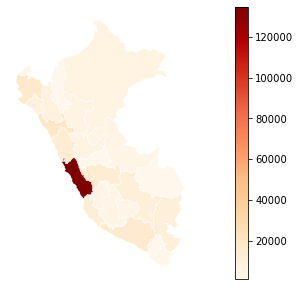

In [17]:
region_geojson_total.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='Muertes_total',legend=True,cmap='OrRd').axis('off')

## Leyenda la poblacion por Region

In [18]:
region_poblacion = pd.read_csv(join(ruta,'poblacion_censo_2017_proy_2020.csv'),sep=';')
region_poblacion.head()

,Departamento,Poblacion
0,AMAZONAS,426806
1,ANCASH,1180638
2,APURIMAC,430736
3,AREQUIPA,1497438
4,AYACUCHO,668213


In [19]:
region_geojson_total_2 = pd.merge(region_geojson_total,region_poblacion,how='left',left_on='NOMBDEP', right_on='Departamento')
region_geojson_total_2

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,departamento,Muertes_total,Departamento,Poblacion
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,1514,AMAZONAS,426806
1,ANCASH,166,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,12864,ANCASH,1180638
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,3516,APURIMAC,430736
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,15074,AREQUIPA,1497438
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,3940,AYACUCHO,668213
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",CAJAMARCA,7897,CAJAMARCA,1453711
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",CALLAO,14456,CALLAO,1129854
7,CUSCO,108,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",CUSCO,10864,CUSCO,1357075
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",HUANCAVELICA,3579,HUANCAVELICA,365317
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",HUANUCO,5771,HUANUCO,760267


In [20]:
region_geojson_total_2['total_muerte_x_1000'] = 1000*region_geojson_total_2['Muertes_total'] / region_geojson_total_2['Poblacion']
region_geojson_total_2

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,departamento,Muertes_total,Departamento,Poblacion,total_muerte_x_1000
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,1514,AMAZONAS,426806,3.547279
1,ANCASH,166,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,12864,ANCASH,1180638,10.895804
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,3516,APURIMAC,430736,8.162773
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,15074,AREQUIPA,1497438,10.066527
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,3940,AYACUCHO,668213,5.896323
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",CAJAMARCA,7897,CAJAMARCA,1453711,5.432304
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",CALLAO,14456,CALLAO,1129854,12.794573
7,CUSCO,108,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",CUSCO,10864,CUSCO,1357075,8.005453
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",HUANCAVELICA,3579,HUANCAVELICA,365317,9.796971
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",HUANUCO,5771,HUANUCO,760267,7.590754


(-81.96178512512749,
 -68.02078909138794,
 -19.266543824008192,
 0.8770101196814104)

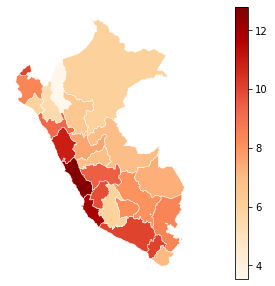

In [21]:
region_geojson_total_2.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='total_muerte_x_1000',legend=True,cmap='OrRd').axis('off')

In [26]:
macroregiones = pd.read_csv(join(ruta,'macroregiones.csv'),sep=';')
region_geojson_total_2 = pd.merge(region_geojson_total_2,macroregiones,how='left',left_on='NOMBDEP', right_on='Departamento')
region_geojson_total_2

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,departamento,Muertes_total,Departamento_x,Poblacion_x,total_muerte_x_1000,Departamento_y,Poblacion_y,Departamento,MacroRegion
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,1514,AMAZONAS,426806,3.547279,AMAZONAS,Oriente,AMAZONAS,Oriente
1,ANCASH,166,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,12864,ANCASH,1180638,10.895804,ANCASH,Norte,ANCASH,Norte
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,3516,APURIMAC,430736,8.162773,APURIMAC,Centro,APURIMAC,Centro
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,15074,AREQUIPA,1497438,10.066527,AREQUIPA,Sur,AREQUIPA,Sur
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,3940,AYACUCHO,668213,5.896323,AYACUCHO,Centro,AYACUCHO,Centro
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",CAJAMARCA,7897,CAJAMARCA,1453711,5.432304,CAJAMARCA,Norte,CAJAMARCA,Norte
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",CALLAO,14456,CALLAO,1129854,12.794573,CALLAO,Lima,CALLAO,Lima
7,CUSCO,108,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",CUSCO,10864,CUSCO,1357075,8.005453,CUSCO,Sur,CUSCO,Sur
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",HUANCAVELICA,3579,HUANCAVELICA,365317,9.796971,HUANCAVELICA,Centro,HUANCAVELICA,Centro
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",HUANUCO,5771,HUANUCO,760267,7.590754,HUANUCO,Centro,HUANUCO,Centro


## Data de la ultima semana

In [121]:
sinadef_covid_last_2week = sinadef_covid[sinadef_covid['FECHA']>='2021-05-01']
#sinadef_covid = sinadef_keep[(sinadef_keep['AÑO']*100+sinadef_keep['MES']>=202003) & (sinadef_keep['MUERTE VIOLENTA']=='SIN REGISTRO')]

In [122]:
sinadef_covid_last_2week

,SEXO,EDAD,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,PROVINCIA DOMICILIO,FECHA,AÑO,MES,MUERTE VIOLENTA
Nº,,,,,,,,,
172873,MASCULINO,57,PERU,LORETO,MAYNAS,2021-05-01,2021,5,SIN REGISTRO
172962,MASCULINO,88,PERU,HUANUCO,MARAÑON,2021-05-01,2021,5,SIN REGISTRO
172986,FEMENINO,69,PERU,CUSCO,QUISPICANCHI,2021-05-01,2021,5,SIN REGISTRO
173016,MASCULINO,39,PERU,LORETO,MAYNAS,2021-05-01,2021,5,SIN REGISTRO
173031,FEMENINO,74,PERU,PASCO,OXAPAMPA,2021-05-01,2021,5,SIN REGISTRO
...,...,...,...,...,...,...,...,...,...
268516,FEMENINO,96,PERU,MADRE DE DIOS,TAMBOPATA,2021-05-02,2021,5,SIN REGISTRO
268517,FEMENINO,73,PERU,JUNIN,TARMA,2021-05-06,2021,5,SIN REGISTRO
268519,MASCULINO,70,PERU,CAJAMARCA,JAEN,2021-05-11,2021,5,SIN REGISTRO


In [123]:
sinadef_covid_last_2week_resume = sinadef_covid_last_2week['DEPARTAMENTO DOMICILIO'].value_counts(dropna=False).to_frame().reset_index().rename(columns={'index': 'departamento','DEPARTAMENTO DOMICILIO':'Muertes_total_2_week'})

In [124]:
sinadef_covid_last_2week_resume

,departamento,Muertes_total_2_week
0,LIMA,5012
1,LA LIBERTAD,974
2,PIURA,849
3,JUNIN,712
4,AREQUIPA,680
5,ANCASH,655
6,ICA,569
7,CUSCO,548
8,PUNO,520
9,LAMBAYEQUE,484


In [125]:
region_geojson_total_3 = pd.merge(region_geojson_total_2,sinadef_covid_last_2week_resume,how='left',left_on='NOMBDEP', right_on='departamento')
region_geojson_total_3

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,tmp,departamento_x,Muertes_total,Departamento,Poblacion,total_muerte_x_100K,total_muerte_x_1000,departamento_y,Muertes_total_2_week
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",1,AMAZONAS,1514,AMAZONAS,426806,0.003547,3.547279,AMAZONAS,73
1,ANCASH,166,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",1,ANCASH,12864,ANCASH,1180638,0.010896,10.895804,ANCASH,655
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",1,APURIMAC,3516,APURIMAC,430736,0.008163,8.162773,APURIMAC,232
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",1,AREQUIPA,15074,AREQUIPA,1497438,0.010067,10.066527,AREQUIPA,680
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",1,AYACUCHO,3940,AYACUCHO,668213,0.005896,5.896323,AYACUCHO,194
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",1,CAJAMARCA,7897,CAJAMARCA,1453711,0.005432,5.432304,CAJAMARCA,447
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",1,CALLAO,14456,CALLAO,1129854,0.012795,12.794573,CALLAO,481
7,CUSCO,108,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",1,CUSCO,10864,CUSCO,1357075,0.008005,8.005453,CUSCO,548
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",1,HUANCAVELICA,3579,HUANCAVELICA,365317,0.009797,9.796971,HUANCAVELICA,172
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",1,HUANUCO,5771,HUANUCO,760267,0.007591,7.590754,HUANUCO,262


In [126]:
region_geojson_total_3['total_muerte_2_week_x_1000'] = 1000*region_geojson_total_3['Muertes_total_2_week'] / region_geojson_total_3['Poblacion']
region_geojson_total_3

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,tmp,departamento_x,Muertes_total,Departamento,Poblacion,total_muerte_x_100K,total_muerte_x_1000,departamento_y,Muertes_total_2_week,total_muerte_2_week_x_1000
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",1,AMAZONAS,1514,AMAZONAS,426806,0.003547,3.547279,AMAZONAS,73,0.171038
1,ANCASH,166,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",1,ANCASH,12864,ANCASH,1180638,0.010896,10.895804,ANCASH,655,0.554785
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",1,APURIMAC,3516,APURIMAC,430736,0.008163,8.162773,APURIMAC,232,0.538613
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",1,AREQUIPA,15074,AREQUIPA,1497438,0.010067,10.066527,AREQUIPA,680,0.454109
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",1,AYACUCHO,3940,AYACUCHO,668213,0.005896,5.896323,AYACUCHO,194,0.290327
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",1,CAJAMARCA,7897,CAJAMARCA,1453711,0.005432,5.432304,CAJAMARCA,447,0.307489
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",1,CALLAO,14456,CALLAO,1129854,0.012795,12.794573,CALLAO,481,0.425719
7,CUSCO,108,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",1,CUSCO,10864,CUSCO,1357075,0.008005,8.005453,CUSCO,548,0.403810
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",1,HUANCAVELICA,3579,HUANCAVELICA,365317,0.009797,9.796971,HUANCAVELICA,172,0.470824
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",1,HUANUCO,5771,HUANUCO,760267,0.007591,7.590754,HUANUCO,262,0.344616


(-81.96178512512749,
 -68.02078909138794,
 -19.266543824008192,
 0.8770101196814104)

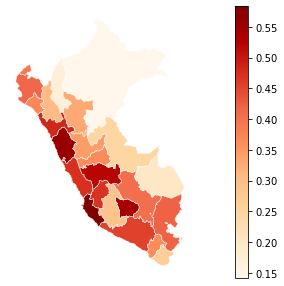

In [127]:
region_geojson_total_3.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='total_muerte_2_week_x_1000',legend=True,cmap='OrRd').axis('off')

(-81.96178512512749,
 -68.02078909138794,
 -19.266543824008192,
 0.8770101196814104)

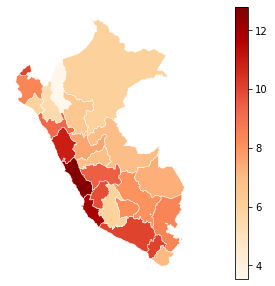

In [128]:
region_geojson_total_2.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='total_muerte_x_1000',legend=True,cmap='OrRd').axis('off')